<a href="https://colab.research.google.com/github/Cristiand056/Alura_Teleconx_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [ ]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df_cust = pd.json_normalize(df['customer'])
df_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
df_phone = pd.json_normalize(df['phone'])
df_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
df_int = pd.json_normalize(df['internet'])
df_int.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
df_acc = pd.json_normalize(df['account'])
df_acc.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_limpio = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)
df_limpio.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [ ]:
df_completo = df_limpio.join(df_cust).join(df_phone).join(df_int).join(df_acc)
df_completo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

## Comprobar nulos

In [ ]:
df_completo.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
import numpy as np

In [ ]:
df_completo['Charges.Total'] = df_completo['Charges.Total'].replace(' ', 0.0)

In [ ]:
df_completo['Charges.Total'] = df_completo['Charges.Total'].astype(np.float64)

In [ ]:
df_completo.rename(columns={'Charges.Total': 'ChargesTotal',
                    'Charges.Monthly':'ChargesMonthly',
                    'gender': 'Gender',
                    'tenure': 'Tenure'}, inplace=True)

In [ ]:
df_completo['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df_completo['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
df_completo = df_completo[df_completo['Churn'] != ''].reset_index(drop=True)

In [ ]:
df_completo['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
df_completo.replace({'Yes': 1, 'No': 0, 'No phone service': 2}, inplace=True)

<ipython-input-177-0dee9e356b9c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo.replace({'Yes': 1, 'No': 0, 'No phone service': 2}, inplace=True)


In [ ]:
df_completo['InternetService'].unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

In [ ]:
df_completo.replace({'Fiber optic': 1, 'DSL': 2}, inplace=True)

<ipython-input-179-77c025ac07e0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo.replace({'Fiber optic': 1, 'DSL': 2}, inplace=True)


In [ ]:
df_completo.replace({'Male': 1, 'Female': 0}, inplace=True)

<ipython-input-180-20eb4399153c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo.replace({'Male': 1, 'Female': 0}, inplace=True)


In [ ]:
df_completo.replace({'One year': 0, 'Month-to-month': 1, 'Two year': 2}, inplace=True)

<ipython-input-181-c2e7bbb5ea02>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo.replace({'One year': 0, 'Month-to-month': 1, 'Two year': 2}, inplace=True)


In [ ]:
df_completo['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
df_completo.replace({'Mailed check': 0, 'Electronic check':1 , 'Credit card (automatic)': 2,
       'Bank transfer (automatic)': 3}, inplace=True)

<ipython-input-183-63ad5f7dd8d1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_completo.replace({'Mailed check': 0, 'Electronic check':1 , 'Credit card (automatic)': 2,


In [ ]:
df_completo['Cuentas_Diarias'] = df_completo['ChargesMonthly']/30

In [ ]:
df_completo.tail()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Cuentas_Diarias
7038,9987-LUTYD,0,0,0,0,0,13,1,0,2,...,0,1,0,0,0,0,0,55.15,742.90,1.838333
7039,9992-RRAMN,1,1,0,1,0,22,1,1,1,...,0,0,0,1,1,1,1,85.10,1873.70,2.836667
7040,9992-UJOEL,0,1,0,0,0,2,1,0,2,...,0,0,0,0,1,1,0,50.30,92.75,1.676667
7041,9993-LHIEB,0,1,0,1,1,67,1,0,2,...,1,1,0,1,2,0,0,67.85,4627.65,2.261667
7042,9995-HOTOH,0,1,0,1,1,63,0,2,2,...,1,0,1,1,2,0,1,59.00,3707.60,1.966667


#📊 Carga y análisis

In [ ]:
df_completo.describe()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.127077,1.031521,0.592219,1.425671,64.761692,2279.734304,2.158723
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.737796,0.669984,0.491457,1.068104,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,35.500000,398.550000,1.183333
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Variables Categorícas

### Genero

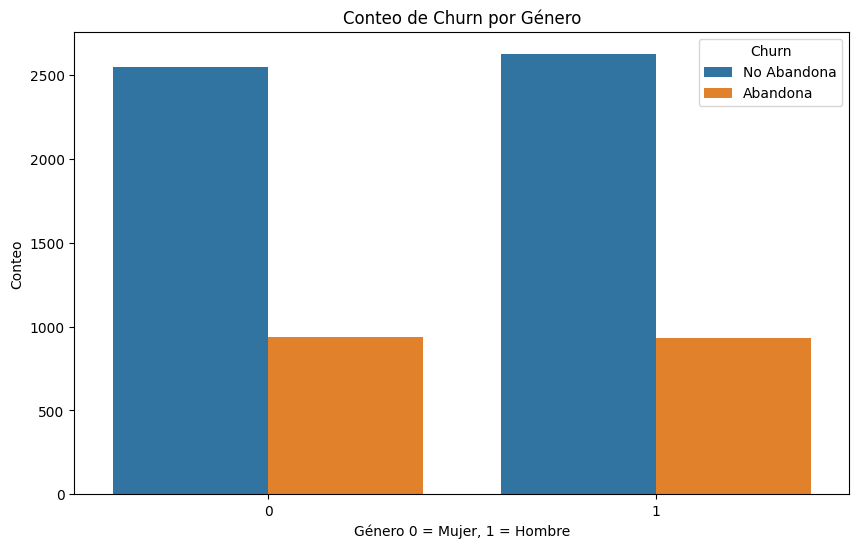

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_completo, x='Gender', hue='Churn')
plt.title('Conteo de Churn por Género')
plt.xlabel('Género 0 = Mujer, 1 = Hombre')
plt.ylabel('Conteo')
plt.legend(title='Churn', labels=['No Abandona', 'Abandona'])
plt.show()

In [ ]:
churn_prop = df_completo.groupby('Gender')['Churn'].value_counts()
churn_prop

Gender  Churn
0       0        2549
        1         939
1       0        2625
        1         930
Name: count, dtype: int64

### Análisis
Viendo el resultado, no hay relación entre el abandono y el genero, la gráfica muestra que estan empatado entre hombres y mujeres

### Tipo de contarto

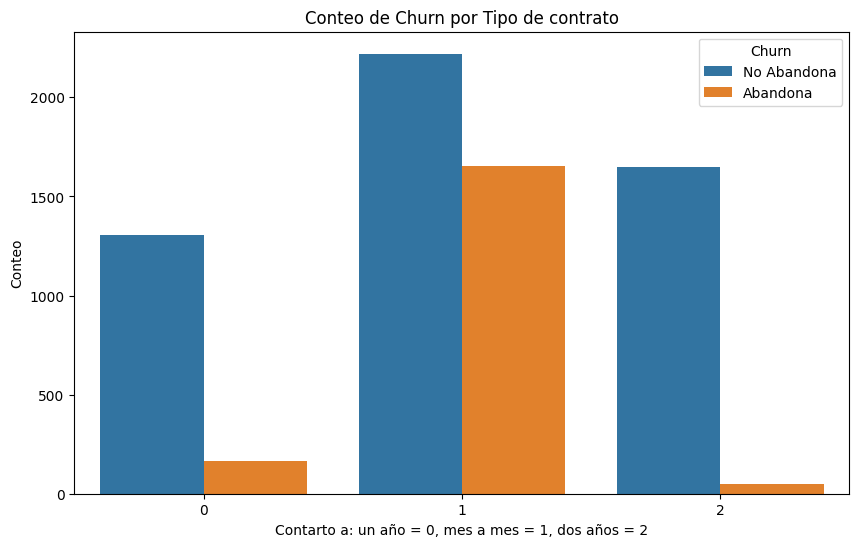

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_completo, x='Contract', hue='Churn')
plt.title('Conteo de Churn por Tipo de contrato')
plt.xlabel('Contarto a: un año = 0, mes a mes = 1, dos años = 2')
plt.ylabel('Conteo')
plt.legend(title='Churn', labels=['No Abandona', 'Abandona'])
plt.show()

### Metódo de pago

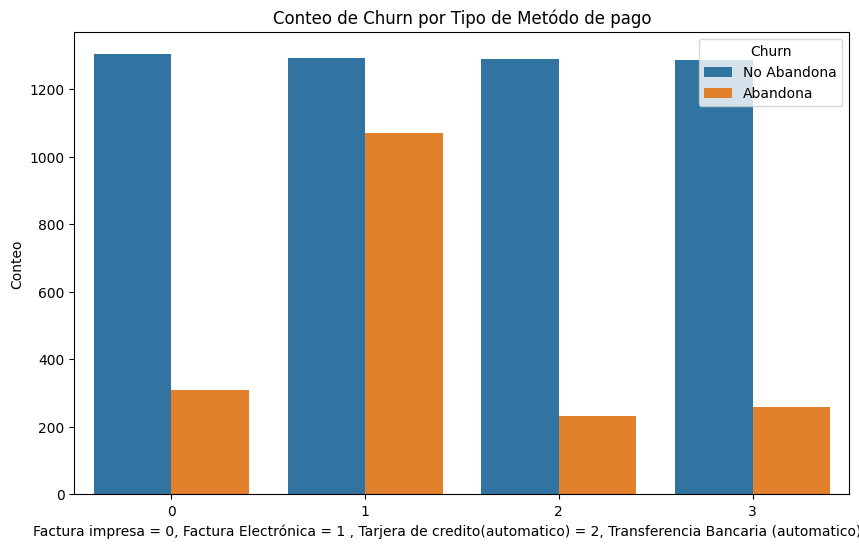

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_completo, x='PaymentMethod', hue='Churn')
plt.title('Conteo de Churn por Tipo de Metódo de pago')
plt.xlabel('Factura impresa = 0, Factura Electrónica = 1 , Tarjera de credito(automatico) = 2, Transferencia Bancaria (automatico) = 3')
plt.ylabel('Conteo')
plt.legend(title='Churn', labels=['No Abandona', 'Abandona'])
plt.show()

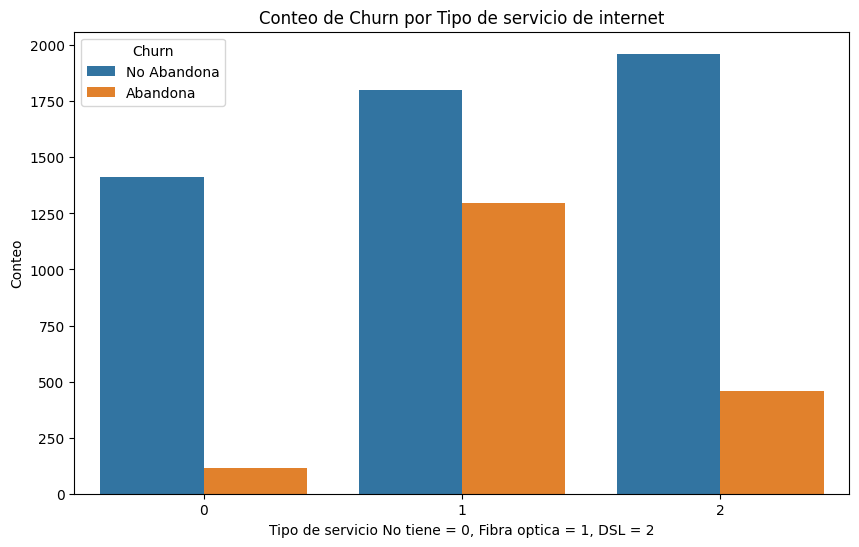

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_completo, x='InternetService', hue='Churn')
plt.title('Conteo de Churn por Tipo de servicio de internet')
plt.xlabel('Tipo de servicio No tiene = 0, Fibra optica = 1, DSL = 2')
plt.ylabel('Conteo')
plt.legend(title='Churn', labels=['No Abandona', 'Abandona'])
plt.show()

Se ha encontrado que las personas con el servicio de interner con fibra optica, son altamente propensor a abandonar y los que no tienen servicio de internet, su tasa de abamdono es minima

Se debe revisar la calida del servicio de fibra optica, ya que podria ser un factor de abandono

La gráfica no me da ninguna información concluyente, exceto que el porcentaje de personas que abandonan el contrato más de 40% en la personas ciudadanas mayores

## Variables Númericas

### Total gastado

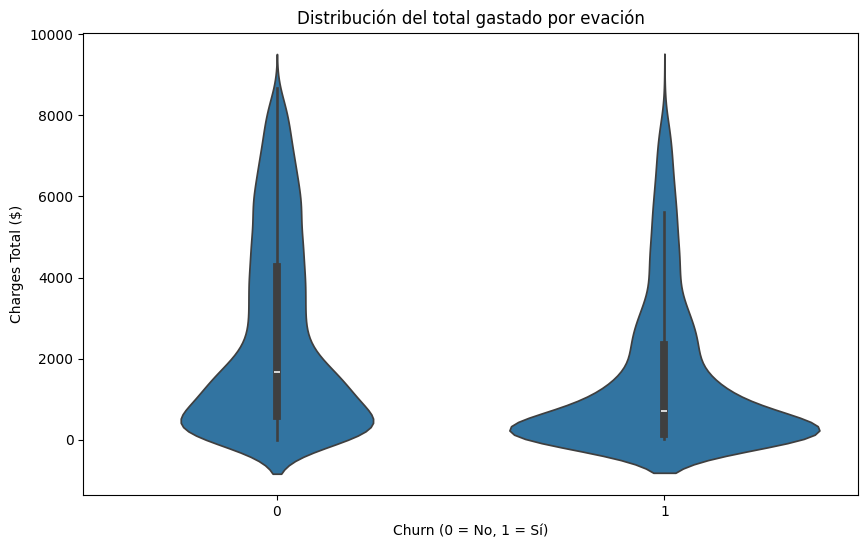

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_completo, x='Churn', y='ChargesTotal')
plt.title('Distribución del total gastado por evación')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Charges Total ($)')
plt.show()

### Tiempo de contrato

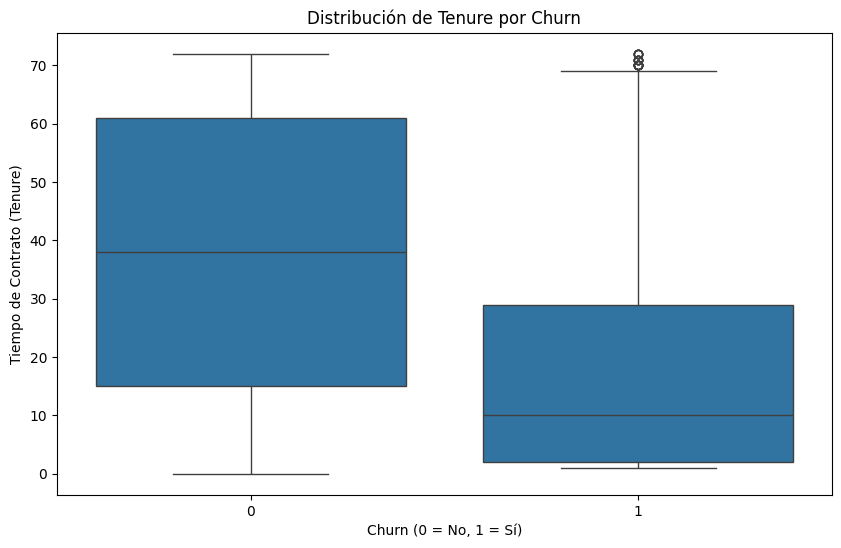

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_completo, x='Churn', y='Tenure')
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de Contrato (Tenure)')
plt.show()

#📄Informe final

## **Introducción:**

Este análisis es sobre los posibles factores de riesgo de la evasión o abandono de los servicios (Churn) de la empresa Telmex-Latam, entras palabras que tipo de cliente es más propenso a la evación de los planes.

## **Limpieza y Tratamiento de Datos:**

1. Realice la corecta transformación del archivo Json a un data frame de pandas, usando el metodo **pd.json_normalize**, para ajustar las columnas anidadas.

2. Se borraron las columnas 'customer', 'phone', 'internet', 'account' y se agregaron las columnas ya mencionadas, pero con los datos ya convertidos en data frame.

3. Se verificaron la existencia de valores nulo, en este caso no se encontro ninguno.

4. Se corrijieron los nombres de las columnas, los valores vacios y se convirtieron las variable categoricas a valores númericos, como por ejemplo, 'Yes': 1, 'No': 0, 'No phone service': 2 y se borraron las filas que no su registro Churn era vacio.

## **Análisis Exploratorio de Datos:**

### Variables categoricas

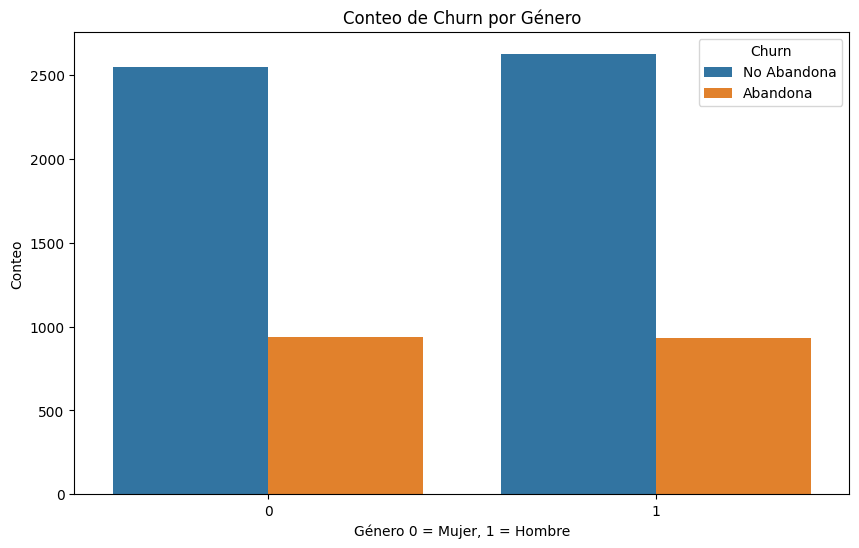

Se observa que no hay mucha relación entre hombres y mujeres y la evación(Churn)

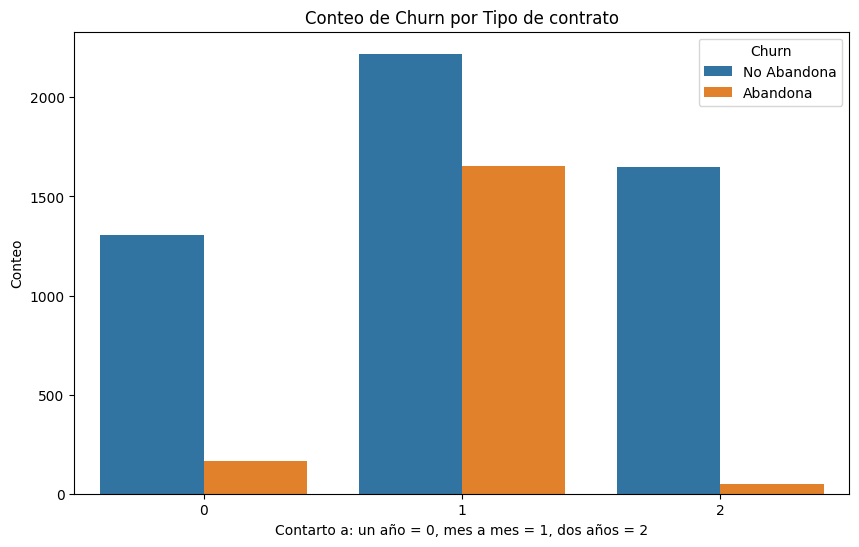

En el la relación entre tipo de contrato se encontro una relación entre las personas que su tipo de contrato es mes a mes y el abandono o evación(Churn)

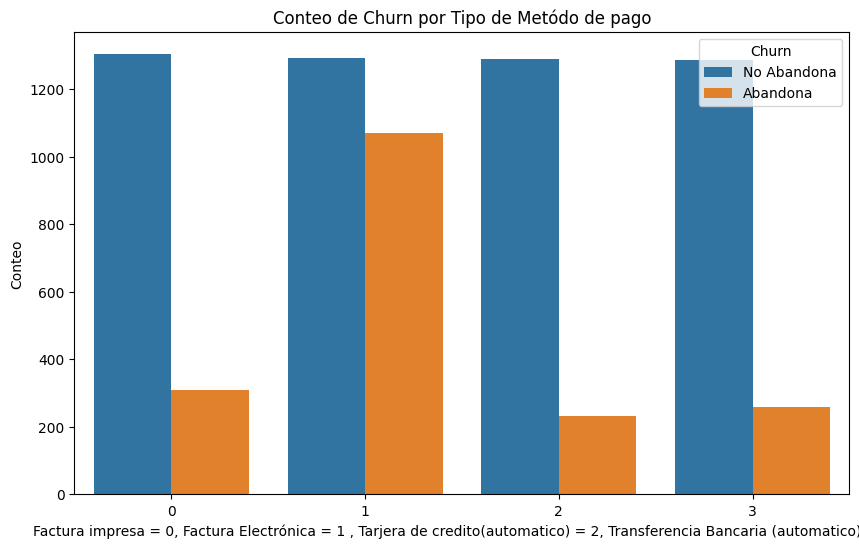

Muy parecido a lo anterior, se evidencia una clara cantidad de abandono o evación(Churn) y El metódo de pago por factura electrónica

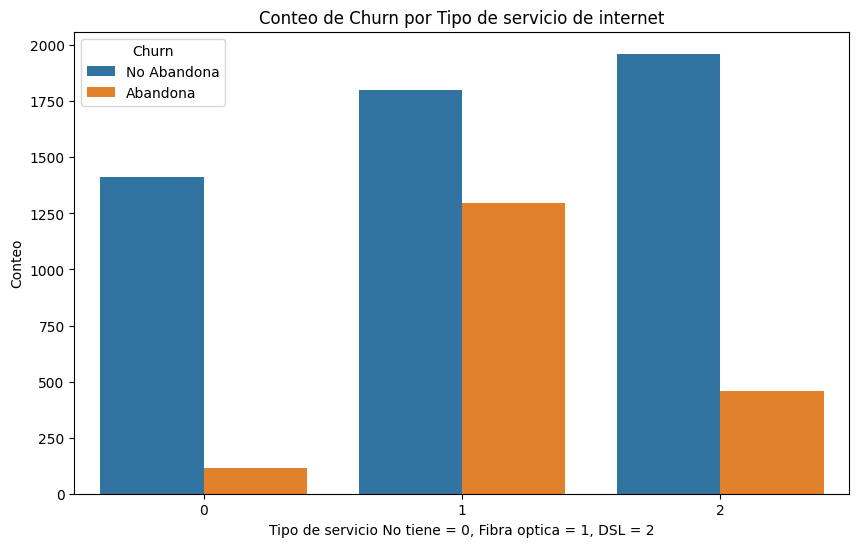

Se encuentra un alto indice de abandono o evación(Churn), en los usuarios con fibra optica

### Variables númericas